In [108]:
import pandas as pd

# Load the cleaned data
data = pd.read_csv('AAPL_cleaned_data.csv', index_col='Date', parse_dates=True)

# Ensure data types are correct
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Create lag features
data['Lag_1'] = data['Close'].shift(1)  # Lag 1 day
data['Lag_5'] = data['Close'].shift(5)  # Lag 5 days
data['Lag_30'] = data['Close'].shift(30)  # Lag 30 days

# Display the first few rows
print(data[['Close', 'Lag_1', 'Lag_5', 'Lag_30']].head(100))
data.to_csv('AAPL_feature_data.csv')
print("Data saved to 'AAPL_feature_data.csv'.")

               Close     Lag_1     Lag_5    Lag_30
Date                                              
1995-01-03  0.285766       NaN       NaN       NaN
1995-01-04  0.293213  0.285766       NaN       NaN
1995-01-05  0.289489  0.293213       NaN       NaN
1995-01-06  0.312760  0.289489       NaN       NaN
1995-01-09  0.306826  0.312760       NaN       NaN
...              ...       ...       ...       ...
1995-05-18  0.323887  0.328554  0.306152  0.259483
1995-05-19  0.319220  0.323887  0.325754  0.274417
1995-05-22  0.329487  0.319220  0.325754  0.274417
1995-05-23  0.327620  0.329487  0.326687  0.273484
1995-05-24  0.324820  0.327620  0.328554  0.281885

[100 rows x 4 columns]
Data saved to 'AAPL_feature_data.csv'.


In [110]:
import pandas as pd

# Load the cleaned data
data = pd.read_csv('AAPL_feature_data.csv', index_col='Date', parse_dates=True)

# Ensure data types are correct
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average
data['MA200'] = data['Close'].rolling(window=200).mean()  # 200-day moving average

# Display the first few rows
print(data[['Close', 'MA50', 'MA200']].head(1000))
data.to_csv('AAPL_feature_data.csv')
print("Data saved to 'AAPL_feature_data.csv'.")

               Close      MA50     MA200
Date                                    
1995-01-03  0.285766       NaN       NaN
1995-01-04  0.293213       NaN       NaN
1995-01-05  0.289489       NaN       NaN
1995-01-06  0.312760       NaN       NaN
1995-01-09  0.306826       NaN       NaN
...              ...       ...       ...
1998-12-09  0.241013  0.267487  0.242878
1998-12-10  0.241013  0.266565  0.243198
1998-12-11  0.254194  0.266273  0.243579
1998-12-14  0.244780  0.265887  0.243946
1998-12-15  0.252782  0.266094  0.244339

[1000 rows x 3 columns]
Data saved to 'AAPL_feature_data.csv'.


In [112]:
import pandas as pd
import numpy as np

# Load the cleaned data
data = pd.read_csv('AAPL_feature_data.csv', index_col='Date', parse_dates=True)

# Ensure data types are correct
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Function to calculate RSI
def compute_rsi(data, window=14):
    delta = data.diff()  # Calculate price change
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()  # Positive change
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()  # Negative change
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI for 14-day window
data['RSI'] = compute_rsi(data['Close'])

# Display the first few rows
print(data[['Close', 'RSI']].head(1000))
data.to_csv('AAPL_feature_data.csv')
print("Data saved to 'AAPL_feature_data.csv'.")

               Close        RSI
Date                           
1995-01-03  0.285766        NaN
1995-01-04  0.293213        NaN
1995-01-05  0.289489        NaN
1995-01-06  0.312760        NaN
1995-01-09  0.306826        NaN
...              ...        ...
1998-12-09  0.241013  39.299674
1998-12-10  0.241013  38.095313
1998-12-11  0.254194  45.421199
1998-12-14  0.244780  39.208686
1998-12-15  0.252782  43.448068

[1000 rows x 2 columns]
Data saved to 'AAPL_feature_data.csv'.


In [114]:
import pandas as pd
import numpy as np

# Load the cleaned data
data = pd.read_csv('AAPL_feature_data.csv', index_col='Date', parse_dates=True)

# Ensure data types are correct
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()  # Daily returns

# Calculate log returns
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))  # Log returns

# Display the first few rows
print(data[['Close', 'Daily_Return', 'Log_Return']].head())
data.to_csv('AAPL_feature_data.csv')
print("Data saved to 'AAPL_feature_data.csv'.")

               Close  Daily_Return  Log_Return
Date                                          
1995-01-03  0.285766           NaN         NaN
1995-01-04  0.293213      0.026060    0.025726
1995-01-05  0.289489     -0.012700   -0.012781
1995-01-06  0.312760      0.080386    0.077318
1995-01-09  0.306826     -0.018973   -0.019155
Data saved to 'AAPL_feature_data.csv'.


In [116]:
import pandas as pd
import numpy as np

# Load the cleaned data
data = pd.read_csv('AAPL_feature_data.csv', index_col='Date', parse_dates=True)

# Ensure data types are correct
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Calculate log returns
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

# Calculate rolling volatility (30-day rolling window)
data['Volatility'] = data['Log_Return'].rolling(window=30).std() * np.sqrt(30)  # 30-day volatility

# Display the first few rows
print(data[['Close', 'Volatility']].head(200))
data.to_csv('AAPL_feature_data.csv')
print("Data saved to 'AAPL_feature_data.csv'.")

               Close  Volatility
Date                            
1995-01-03  0.285766         NaN
1995-01-04  0.293213         NaN
1995-01-05  0.289489         NaN
1995-01-06  0.312760         NaN
1995-01-09  0.306826         NaN
...              ...         ...
1995-10-10  0.260444    0.149492
1995-10-11  0.261851    0.149686
1995-10-12  0.265136    0.150428
1995-10-13  0.270299    0.152659
1995-10-16  0.271237    0.152888

[200 rows x 2 columns]
Data saved to 'AAPL_feature_data.csv'.


In [118]:
import pandas as pd

# Load the cleaned data
data = pd.read_csv('AAPL_feature_data.csv', index_col='Date', parse_dates=True)

# Extract day of the week, month, and year as features
data['Day_of_Week'] = data.index.dayofweek
data['Month'] = data.index.month
data['Year'] = data.index.year

# Display the first few rows
print(data[['Close', 'Day_of_Week', 'Month', 'Year']].head())
data.to_csv('AAPL_feature_data.csv')
print("Data saved to 'AAPL_feature_data.csv'.")

               Close  Day_of_Week  Month  Year
Date                                          
1995-01-03  0.285766            1      1  1995
1995-01-04  0.293213            2      1  1995
1995-01-05  0.289489            3      1  1995
1995-01-06  0.312760            4      1  1995
1995-01-09  0.306826            0      1  1995
Data saved to 'AAPL_feature_data.csv'.


In [120]:
import pandas as pd

# Load the cleaned data
data = pd.read_csv('AAPL_feature_data.csv', index_col='Date', parse_dates=True)

# Ensure data types are correct
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Calculate 50-day moving average
data['MA50'] = data['Close'].rolling(window=50).mean()

# Calculate rolling standard deviation
data['STD50'] = data['Close'].rolling(window=50).std()

# Calculate Bollinger Bands
data['Bollinger_Upper'] = data['MA50'] + (2 * data['STD50'])  # Upper Band
data['Bollinger_Lower'] = data['MA50'] - (2 * data['STD50'])  # Lower Band

# Display the first few rows
print(data[['Close', 'Bollinger_Upper', 'Bollinger_Lower']].head(100))
data.to_csv('AAPL_feature_data.csv')
print("Data saved to 'AAPL_feature_data.csv'.")

               Close  Bollinger_Upper  Bollinger_Lower
Date                                                  
1995-01-03  0.285766              NaN              NaN
1995-01-04  0.293213              NaN              NaN
1995-01-05  0.289489              NaN              NaN
1995-01-06  0.312760              NaN              NaN
1995-01-09  0.306826              NaN              NaN
...              ...              ...              ...
1995-05-18  0.323887         0.323326         0.244942
1995-05-19  0.319220         0.324863         0.244301
1995-05-22  0.329487         0.327420         0.243125
1995-05-23  0.327620         0.329947         0.242316
1995-05-24  0.324820         0.331957         0.242844

[100 rows x 3 columns]
Data saved to 'AAPL_feature_data.csv'.


In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the cleaned data
data = pd.read_csv('AAPL_feature_data.csv', index_col='Date', parse_dates=True)

# Ensure 'Close' column is numeric
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Feature Engineering: Create moving averages and RSI
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# RSI Calculation
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data['Close'])

# Lag Features (lagging 'Close' price by 1, 5, and 30 days)
data['Lag_1'] = data['Close'].shift(1)
data['Lag_5'] = data['Close'].shift(5)
data['Lag_30'] = data['Close'].shift(30)

# Calculate Daily and Log Returns
data['Daily_Return'] = data['Close'].pct_change()
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

# Calculate Volatility (Rolling standard deviation of returns)
data['Volatility'] = data['Log_Return'].rolling(window=50).std()

# Bollinger Bands
data['STD50'] = data['Close'].rolling(window=50).std()
data['Bollinger_Upper'] = data['MA50'] + (2 * data['STD50'])
data['Bollinger_Lower'] = data['MA50'] - (2 * data['STD50'])

# Adding Day, Month, and Year from the 'Date' column
data['Day_of_Week'] = data.index.dayofweek
data['Month'] = data.index.month
data['Year'] = data.index.year

# Check the new columns are present in the DataFrame
print(data[['Close', 'MA50', 'MA200', 'RSI', 'Lag_1', 'Lag_5', 'Lag_30', 'Daily_Return', 'Log_Return', 'Volatility', 'Bollinger_Upper', 'Bollinger_Lower']].head())

# Feature Scaling using StandardScaler
scaler = StandardScaler()
data[['Log_Close', 'MA50', 'MA200', 'RSI', 'Lag_1', 'Lag_5', 'Lag_30', 'Daily_Return', 'Log_Return', 'Volatility']] = scaler.fit_transform(data[['Close', 'MA50', 'MA200', 'RSI', 'Lag_1', 'Lag_5', 'Lag_30', 'Daily_Return', 'Log_Return', 'Volatility']])

# Display the first few rows to check the results
print(data[['Close', 'Log_Close', 'MA50', 'MA200', 'RSI', 'Lag_1', 'Lag_5', 'Lag_30', 'Daily_Return', 'Log_Return', 'Volatility', 'Bollinger_Upper', 'Bollinger_Lower']].head())

# Save the final data to a new CSV file
data.to_csv('AAPL_feature_data.csv.csv')

print("Data saved to 'AAPL_featurescaling_data.csv'.")


               Close  MA50  MA200  RSI     Lag_1  Lag_5  Lag_30  Daily_Return  \
Date                                                                            
1995-01-03  0.285766   NaN    NaN  NaN       NaN    NaN     NaN           NaN   
1995-01-04  0.293213   NaN    NaN  NaN  0.285766    NaN     NaN      0.026060   
1995-01-05  0.289489   NaN    NaN  NaN  0.293213    NaN     NaN     -0.012700   
1995-01-06  0.312760   NaN    NaN  NaN  0.289489    NaN     NaN      0.080386   
1995-01-09  0.306826   NaN    NaN  NaN  0.312760    NaN     NaN     -0.018973   

            Log_Return  Volatility  Bollinger_Upper  Bollinger_Lower  
Date                                                                  
1995-01-03         NaN         NaN              NaN              NaN  
1995-01-04    0.025726         NaN              NaN              NaN  
1995-01-05   -0.012781         NaN              NaN              NaN  
1995-01-06    0.077318         NaN              NaN              NaN  
1995-0

In [130]:
import pandas as pd

# Load the cleaned data
data = pd.read_csv('AAPL_feature_data.csv', index_col='Date', parse_dates=True)

# Ensure data types are correct
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Count the number of rows before dropping
initial_row_count = data.shape[0]

# Drop rows with any missing values
data.dropna(inplace=True)

# Count the number of rows after dropping
final_row_count = data.shape[0]

# Display the first few rows
print(data.head())

# Print the number of rows dropped
rows_dropped = initial_row_count - final_row_count
print(f"Number of rows dropped: {rows_dropped}")
data.to_csv('AAPL_feature_data.csv')
print("Data saved to 'AAPL_feature_data.csv'.")

               Close      High       Low      Open     Volume     Lag_1  \
Date                                                                      
1995-10-16  0.271237  0.277806  0.269360  0.272175  182067200  0.270299   
1995-10-17  0.274991  0.276868  0.269360  0.274052  178617600  0.271237   
1995-10-18  0.280622  0.297047  0.275929  0.277806  512400000  0.274991   
1995-10-19  0.260913  0.271237  0.260913  0.269360  944899200  0.280622   
1995-10-20  0.263728  0.264667  0.259974  0.264667  386332800  0.260913   

               Lag_5    Lag_30      MA50     MA200        RSI  Daily_Return  \
Date                                                                          
1995-10-16  0.261382  0.322387  0.303908  0.310072  42.308265      0.003472   
1995-10-17  0.260444  0.326610  0.302912  0.310018  52.499791      0.013840   
1995-10-18  0.261851  0.328487  0.302160  0.309955  47.221735      0.020477   
1995-10-19  0.265136  0.335996  0.300920  0.309812  35.915720     -0.070233   


In [126]:
# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

# Total missing values in the entire dataset
total_missing = missing_values.sum()

# Display the total number of missing values
print(f"Total missing values in the dataset: {total_missing}")


Total missing values in the dataset: 496


In [128]:
# Check for missing values in each column
missing_values_per_column = data.isnull().sum()

# Display the missing values for each column
print("Missing values in each column:")
print(missing_values_per_column)


Missing values in each column:
Close                0
High                 0
Low                  0
Open                 0
Volume               0
Lag_1                1
Lag_5                5
Lag_30              30
MA50                49
MA200              199
RSI                 13
Daily_Return         1
Log_Return           1
Volatility          50
Day_of_Week          0
Month                0
Year                 0
STD50               49
Bollinger_Upper     49
Bollinger_Lower     49
Log_Close            0
dtype: int64


In [132]:
def stochastic_oscillator(data, window=14):
    low_min = data['Low'].rolling(window=window).min()
    high_max = data['High'].rolling(window=window).max()
    stoch = 100 * (data['Close'] - low_min) / (high_max - low_min)
    return stoch

data['Stochastic_Oscillator'] = stochastic_oscillator(data)
data.to_csv('AAPL_feature2222_data.csv')
print("Data saved to 'AAPL_feature_data.csv'.")

Data saved to 'AAPL_feature_data.csv'.


In [139]:
import pandas as pd

# Load the cleaned data
data = pd.read_csv('AAPL_feature_data.csv', index_col='Date', parse_dates=True)

# Ensure data types are correct
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Count the number of rows before dropping
initial_row_count = data.shape[0]

# Drop rows with any missing values
data.dropna(inplace=True)

# Count the number of rows after dropping
final_row_count = data.shape[0]

# Display the first few rows
print(data.head())

# Print the number of rows dropped
rows_dropped = initial_row_count - final_row_count
print(f"Number of rows dropped: {rows_dropped}")
data.to_csv('AAPL_feature_data.csv')
print("Data saved to 'AAPL_feature_data.csv'.")

               Close      High       Low      Open     Volume     Lag_1  \
Date                                                                      
1995-11-02  0.274991  0.276868  0.272175  0.276868  152756800  0.274991   
1995-11-03  0.274052  0.276868  0.269360  0.275929  179435200  0.274991   
1995-11-06  0.286253  0.290946  0.273114  0.274052  311774400  0.274052   
1995-11-07  0.297516  0.304085  0.281560  0.283438  736388800  0.286253   
1995-11-08  0.291884  0.307839  0.290946  0.298454  358825600  0.297516   

               Lag_5    Lag_30      MA50     MA200  ...  Daily_Return  \
Date                                                ...                 
1995-11-02  0.261851  0.277806  0.287917  0.306559  ...      0.000000   
1995-11-03  0.260913  0.278275  0.286528  0.306342  ...     -0.003413   
1995-11-06  0.264667  0.281678  0.285533  0.306200  ...      0.044520   
1995-11-07  0.272645  0.280622  0.285026  0.306138  ...      0.039344   
1995-11-08  0.274991  0.272175  0.28

In [4]:
import pandas as pd
import numpy as np

# Assuming 'data' is your cleaned DataFrame
# Make a copy to avoid modifying the original DataFrame
df = pd.read_csv('AAPL_feature_data.csv', index_col='Date', parse_dates=True)

# 1. Calculate MACD (Moving Average Convergence Divergence)
# Short-term EMA (e.g., 12-day) and Long-term EMA (e.g., 26-day)
short_window = 12
long_window = 26
signal_window = 9

df['EMA12'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=long_window, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal_Line'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()

# 2. Calculate OBV (On-Balance Volume)
df['Daily_Change'] = df['Close'] - df['Close'].shift(1)
df['Direction'] = np.where(df['Daily_Change'] > 0, 1, np.where(df['Daily_Change'] < 0, -1, 0))
df['OBV'] = (df['Volume'] * df['Direction']).cumsum()

# Drop intermediate columns used in OBV calculation
df.drop(columns=['Daily_Change', 'Direction'], inplace=True)

# 3. Interaction Terms
# Example: RSI * Volatility
df['RSI_Volatility'] = df['RSI'] * df['Volatility']

# You can create other interaction terms as needed, e.g., Volatility with Lag values
df['Volatility_Lag1'] = df['Volatility'] * df['Lag_1']
df['Volatility_Lag5'] = df['Volatility'] * df['Lag_5']

# Display the updated DataFrame
print(df.head())

# Save the updated DataFrame to a new CSV file (optional)
df.to_csv('updated_stock_data.csv', index=False)


               Close      High       Low      Open     Volume     Lag_1  \
Date                                                                      
1995-11-02  0.274991  0.276868  0.272175  0.276868  152756800  0.274991   
1995-11-03  0.274052  0.276868  0.269360  0.275929  179435200  0.274991   
1995-11-06  0.286253  0.290946  0.273114  0.274052  311774400  0.274052   
1995-11-07  0.297516  0.304085  0.281560  0.283438  736388800  0.286253   
1995-11-08  0.291884  0.307839  0.290946  0.298454  358825600  0.297516   

               Lag_5    Lag_30      MA50     MA200  ...  Bollinger_Lower  \
Date                                                ...                    
1995-11-02  0.261851  0.277806  0.287917  0.306559  ...         0.234289   
1995-11-03  0.260913  0.278275  0.286528  0.306342  ...         0.235229   
1995-11-06  0.264667  0.281678  0.285533  0.306200  ...         0.236261   
1995-11-07  0.272645  0.280622  0.285026  0.306138  ...         0.236811   
1995-11-08  0.2749

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Load the dataset
df = pd.read_csv('final_featuredata.csv')

# Data Preparation
# Define target and features
target = 'Close'
features = [
    'High', 'Low', 'Open', 'Volume', 'Lag_1', 'Lag_5', 'Lag_30', 'MA50', 'MA200',
    'RSI', 'Daily_Return', 'Log_Return', 'Volatility', 'Day_of_Week', 'Month', 'Year',
    'STD50', 'Bollinger_Upper', 'Bollinger_Lower', 'Stochastic_Oscillator', 'EMA12',
    'EMA26', 'MACD', 'Signal_Line', 'OBV', 'RSI_Volatility', 'Volatility_Lag1',
    'Volatility_Lag5'
]

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Model Training
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,  # Number of trees
    learning_rate=0.05,  # Learning rate
    max_depth=6,  # Maximum tree depth
    subsample=0.8,  # Row sampling
    colsample_bytree=0.8,  # Column sampling
    random_state=42
)

xg_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xg_reg.predict(X_test_scaled)

# Model Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_xgb}")

# Feature Importance
importance = xg_reg.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
print(feature_importance.head(10))


XGBoost Model Evaluation:
Mean Squared Error (MSE): 0.21486714805153806
Top 10 Important Features:
            Feature  Importance
7              MA50    0.285641
5             Lag_5    0.186966
4             Lag_1    0.099872
2              Open    0.099168
1               Low    0.095102
0              High    0.091694
8             MA200    0.067469
20            EMA12    0.056588
21            EMA26    0.016053
17  Bollinger_Upper    0.000632


In [10]:
# Mean Squared Error of 0.21486714805153806 suggests that the model performs reasonably well
!pip install optuna


In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import optuna
import pandas as pd

# Load data
data = pd.read_csv("final_featuredata.csv")
X = data.drop(columns=["Close"])
y = data["Close"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV Hyperparameter Tuning
gb_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

gb_best = grid_search.best_estimator_
y_pred = gb_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE with Best GridSearchCV Model:", mse)

# Optuna Hyperparameter Tuning
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    }

    gb_model = GradientBoostingRegressor(**params, random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best Parameters from Optuna:", study.best_params)

# Train final model with Optuna best params
optuna_params = study.best_params
gb_optuna = GradientBoostingRegressor(**optuna_params, random_state=42)
gb_optuna.fit(X_train, y_train)
y_pred_optuna = gb_optuna.predict(X_test)
mse_optuna = mean_squared_error(y_test, y_pred_optuna)
print("MSE with Best Optuna Model:", mse_optuna)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   4.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   6.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   4.8s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300, subsample=0.8; total time

[I 2024-12-22 21:22:00,048] A new study created in memory with name: no-name-d0d9bc38-e378-4e53-bc7a-2a99ee60c0fe


Best Parameters from GridSearchCV: {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.6}
MSE with Best GridSearchCV Model: 0.1253092772967129


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_19950/3110223210.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_19950/3110223210.py:44: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_19950/3110223210.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': t

Best Parameters from Optuna: {'n_estimators': 240, 'learning_rate': 0.03271475787171668, 'max_depth': 10, 'subsample': 0.6360847436106408, 'min_samples_split': 6, 'min_samples_leaf': 6}
MSE with Best Optuna Model: 0.11666538858291607


In [ ]:
#Best Parameters from Optuna: {'n_estimators': 240, 'learning_rate': 0.03271475787171668, 'max_depth': 10, 'subsample': 0.6360847436106408, 'min_samples_split': 6, 'min_samples_leaf': 6}
#MSE with Best Optuna Model: 0.11666538858291607

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load your data (replace with actual file path)
df = pd.read_csv('final_featuredata.csv')

# 1. Feature Engineering

# a) Create interaction terms
df['Lag_1_Volatility'] = df['Lag_1'] * df['Volatility']
df['RSI_EMA12'] = df['RSI'] * df['EMA12']

# b) Add more lag features (Lag_10, Lag_15, etc.)
df['Lag_10'] = df['Close'].shift(10)
df['Lag_15'] = df['Close'].shift(15)

# c) Generate rolling statistics (e.g., rolling mean and standard deviation for 'Close')
df['Rolling_Mean_10'] = df['Close'].rolling(window=10).mean()
df['Rolling_Std_10'] = df['Close'].rolling(window=10).std()

# 2. Data Preprocessing

# a) Scaling features like 'Volatility' and 'RSI'
scaler = MinMaxScaler()

# Normalize 'Volatility' and 'RSI'
df['Volatility_Scaled'] = scaler.fit_transform(df[['Volatility']])
df['RSI_Scaled'] = scaler.fit_transform(df[['RSI']])

# Alternatively, use StandardScaler if you prefer standardization
scaler_std = StandardScaler()

df['Volatility_Scaled_Std'] = scaler_std.fit_transform(df[['Volatility']])
df['RSI_Scaled_Std'] = scaler_std.fit_transform(df[['RSI']])

# b) Remove features with negligible importance (e.g., Bollinger bands)
df.drop(['Bollinger_Upper', 'Bollinger_Lower'], axis=1, inplace=True)

# Final DataFrame after feature engineering and preprocessing
print(df.head())  # Check the final DataFrame
df.to_csv('final_featuredata.csv', index=False)

      Close      High       Low      Open     Volume     Lag_1     Lag_5  \
0  0.274991  0.276868  0.272175  0.276868  152756800  0.274991  0.261851   
1  0.274052  0.276868  0.269360  0.275929  179435200  0.274991  0.260913   
2  0.286253  0.290946  0.273114  0.274052  311774400  0.274052  0.264667   
3  0.297516  0.304085  0.281560  0.283438  736388800  0.286253  0.272645   
4  0.291884  0.307839  0.290946  0.298454  358825600  0.297516  0.274991   

     Lag_30      MA50     MA200  ...  Lag_1_Volatility  RSI_EMA12  Lag_10  \
0  0.277806  0.287917  0.306559  ...          0.032126  14.999464     NaN   
1  0.278275  0.286528  0.306342  ...          0.032131  14.491883     NaN   
2  0.281678  0.285533  0.306200  ...          0.034077  16.423278     NaN   
3  0.280622  0.285026  0.306138  ...          0.037190  17.588771     NaN   
4  0.272175  0.284388  0.306071  ...          0.037914  22.534020     NaN   

   Lag_15  Rolling_Mean_10  Rolling_Std_10  Volatility_Scaled  RSI_Scaled  \
0  

In [22]:
# 3. Drop rows with missing values
df.dropna(inplace=True)
df.to_csv('final_featuredata.csv', index=False)
# Final DataFrame after feature engineering, preprocessing, and dropping missing values
print(df.head())

       Close      High       Low      Open     Volume     Lag_1     Lag_5  \
15  0.302679  0.304091  0.291852  0.292794  109950400  0.290911  0.299862   
16  0.296560  0.305974  0.296560  0.305974  115875200  0.302679  0.301270   
17  0.301267  0.302208  0.295618  0.296560  176288000  0.296560  0.290007   
18  0.295618  0.302208  0.293735  0.302208  105268800  0.301267  0.290911   
19  0.287145  0.293735  0.286204  0.292794  174854400  0.295618  0.290911   

      Lag_30      MA50     MA200  ...  Lag_1_Volatility  RSI_EMA12    Lag_10  \
15  0.265136  0.278887  0.305820  ...          0.037468  19.704537  0.295639   
16  0.270299  0.279431  0.305674  ...          0.039399  16.695722  0.298454   
17  0.271237  0.279947  0.305546  ...          0.038785  15.588111  0.306901   
18  0.274991  0.280341  0.305421  ...          0.039830  15.576617  0.311594   
19  0.280622  0.280584  0.305268  ...          0.039761  13.143257  0.307839   

      Lag_15  Rolling_Mean_10  Rolling_Std_10  Volatilit

XGBoost Model Evaluation:
Mean Squared Error (MSE): 0.25943922867006
R-squared (R²): 0.9999196489786543
Fitting 3 folds for each of 729 candidates, totalling 2187 fits


[I 2024-12-23 00:05:41,555] A new study created in memory with name: no-name-db4b045d-6156-4cba-98d0-99f8fab10a1a


Best Parameters from GridSearchCV: {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.6}
Gradient Boosting Model (GridSearchCV) Evaluation:
Mean Squared Error (MSE): 0.19244356944324764
R-squared (R²): 0.9999403982295374


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_19950/2116573786.py:89: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_19950/2116573786.py:91: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_19950/2116573786.py:89: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': t

Best Parameters from Optuna: {'n_estimators': 201, 'learning_rate': 0.06398584896789483, 'max_depth': 8, 'subsample': 0.609428851409819, 'min_samples_split': 11, 'min_samples_leaf': 3}
Gradient Boosting Model (Optuna) Evaluation:
Mean Squared Error (MSE): 0.20422548847994165
R-squared (R²): 0.9999367492469495
Cross-validation MSE for XGBoost: 0.33080559246922275
Cross-validation MSE for GB (Optuna-tuned): 0.17692451273409948


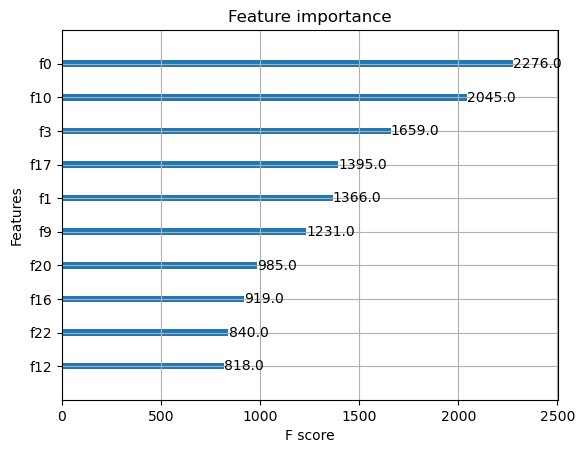

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
import optuna
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('final_featuredata.csv')

# Data Preparation
target = 'Close'
features = [
    'High', 'Low', 'Open', 'Volume', 'Lag_1', 'Lag_5', 'Lag_30', 'MA50', 'MA200',
    'RSI', 'Daily_Return', 'Log_Return', 'Volatility', 'Day_of_Week', 'Month', 'Year',
    'STD50', 'Stochastic_Oscillator', 'EMA12',
    'EMA26', 'MACD', 'Signal_Line', 'OBV', 'RSI_Volatility', 'Volatility_Lag1',
    'Volatility_Lag5'
]

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Model
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xg_reg.fit(X_train_scaled, y_train)

# Predictions with XGBoost
y_pred_xgb = xg_reg.predict(X_test_scaled)

# Evaluation - XGBoost Model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R-squared (R²): {r2_xgb}")

# Gradient Boosting with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation for Gradient Boosting
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

gb_best = grid_search.best_estimator_
y_pred_gb = gb_best.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Model (GridSearchCV) Evaluation:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R-squared (R²): {r2_gb}")

# Optuna Hyperparameter Tuning for Gradient Boosting
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    }

    gb_model = GradientBoostingRegressor(**params, random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, n_jobs=-1)

# Best parameters from Optuna
print("Best Parameters from Optuna:", study.best_params)

# Train final model with Optuna best parameters
optuna_params = study.best_params
gb_optuna = GradientBoostingRegressor(**optuna_params, random_state=42)
gb_optuna.fit(X_train, y_train)
y_pred_optuna = gb_optuna.predict(X_test)

mse_optuna = mean_squared_error(y_test, y_pred_optuna)
r2_optuna = r2_score(y_test, y_pred_optuna)

print("Gradient Boosting Model (Optuna) Evaluation:")
print(f"Mean Squared Error (MSE): {mse_optuna}")
print(f"R-squared (R²): {r2_optuna}")

# Cross-validation for XGBoost
cv_scores_xgb = cross_val_score(xg_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_gb = cross_val_score(gb_optuna, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation MSE for XGBoost: {-cv_scores_xgb.mean()}")
print(f"Cross-validation MSE for GB (Optuna-tuned): {-cv_scores_gb.mean()}")

# Feature Importance Plot for XGBoost
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg, importance_type='weight', max_num_features=10)
plt.show()


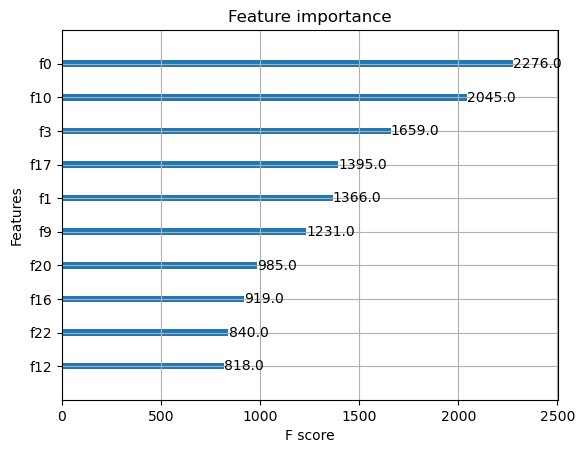

In [28]:
# Feature Importance Plot for XGBoost
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg, importance_type='weight', max_num_features=10)
plt.show()


In [35]:
import joblib

# Save the trained XGBoost model
joblib.dump(xg_reg, 'xgboost_model.pkl')

# Save the trained Gradient Boosting model (from GridSearchCV)
joblib.dump(gb_best, 'gb_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Load the models and scaler
xgboost_model = joblib.load('xgboost_model.pkl')
gb_model = joblib.load('gb_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define the endpoint for predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from the POST request
        data = request.get_json()  # expecting JSON input

        # Convert the data into numpy array (assuming it's a list of feature values)
        input_data = np.array(data['features']).reshape(1, -1)

        # Scale the input data
        input_data_scaled = scaler.transform(input_data)

        # Predict using XGBoost model
        xgb_prediction = xgboost_model.predict(input_data_scaled)

        # Predict using Gradient Boosting model
        gb_prediction = gb_model.predict(input_data)

        # Return the prediction as JSON response
        return jsonify({
            'XGBoost_Prediction': xgb_prediction[0],
            'GB_Prediction': gb_prediction[0]
        })

    except Exception as e:
        return jsonify({'error': str(e)})

# Run the Flask app
try: 
    if  __name__ == '__main__':
        app.run(debug=True,port=8000)
except:
    print("Exception occured!")
    from werkzeug.serving import run_simple
    run_simple('localhost', 8000, app)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

Exception occured!


127.0.0.1 - - [23/Dec/2024 04:12:50] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [23/Dec/2024 04:12:50] "GET /favicon.ico HTTP/1.1" 404 -
